# CSAI502 - 2631: Artificial Neural Networks

## First Semester 2020

## Corse Project: Arabic Sign Letters

In [ ]:
# Team Members:
# Gammas sheleueh. Alhrbi


## Dataset

Link: https://data.mendeley.com/datasets/y7pckrw6z2/1

![Signs_32_New%20%281%29.png](attachment:Signs_32_New%20%281%29.png)

## Class Names

In [ ]:
class_names = ['ain',
 'al',
 'aleff',
 'bb',
 'dal',
 'dha',
 'dhad',
 'fa',
 'gaaf',
 'ghain',
 'ha',
 'haa',
 'jeem',
 'kaaf',
 'khaa',
 'la',
 'laam',
 'meem',
 'nun',
 'ra',
 'saad',
 'seen',
 'sheen',
 'ta',
 'taa',
 'thaa',
 'thal',
 'toot',
 'waw',
 'ya',
 'yaa',
 'zay']

## Required Libraries

In [ ]:
import keras

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
import cv2

In [ ]:
import numpy as np
import pandas as pd


## Image Data Generation & Augmentation

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data_generator = keras.preprocessing.image.ImageDataGenerator(
    zca_epsilon=1e-06,
    rotation_range=45,
    width_shift_range=0.4,
    height_shift_range=0.2,
    shear_range=0.0,
    zoom_range=0.35,
    horizontal_flip=True,
    rescale=1.0/255.0,
    validation_split=0.25,
    dtype=None,
)

In [ ]:
train_generator = data_generator.flow_from_directory(
    '/content/drive/MyDrive/ArASL_Database_54K_Final',
    target_size=(64, 64),
    color_mode="grayscale",
    class_mode="sparse",
    batch_size=32,
    seed=123,
    subset='training'
)

validation_generator = data_generator.flow_from_directory(
    '/content/drive/MyDrive/ArASL_Database_54K_Final',
    target_size=(64, 64),
    color_mode="grayscale",
    class_mode="sparse",
    batch_size=32,
    seed=123,
    subset='validation'
)

Found 4191 images belonging to 32 classes.
Found 1385 images belonging to 32 classes.


## Display Sample Images

In [ ]:
(images, labels) = train_generator.next()

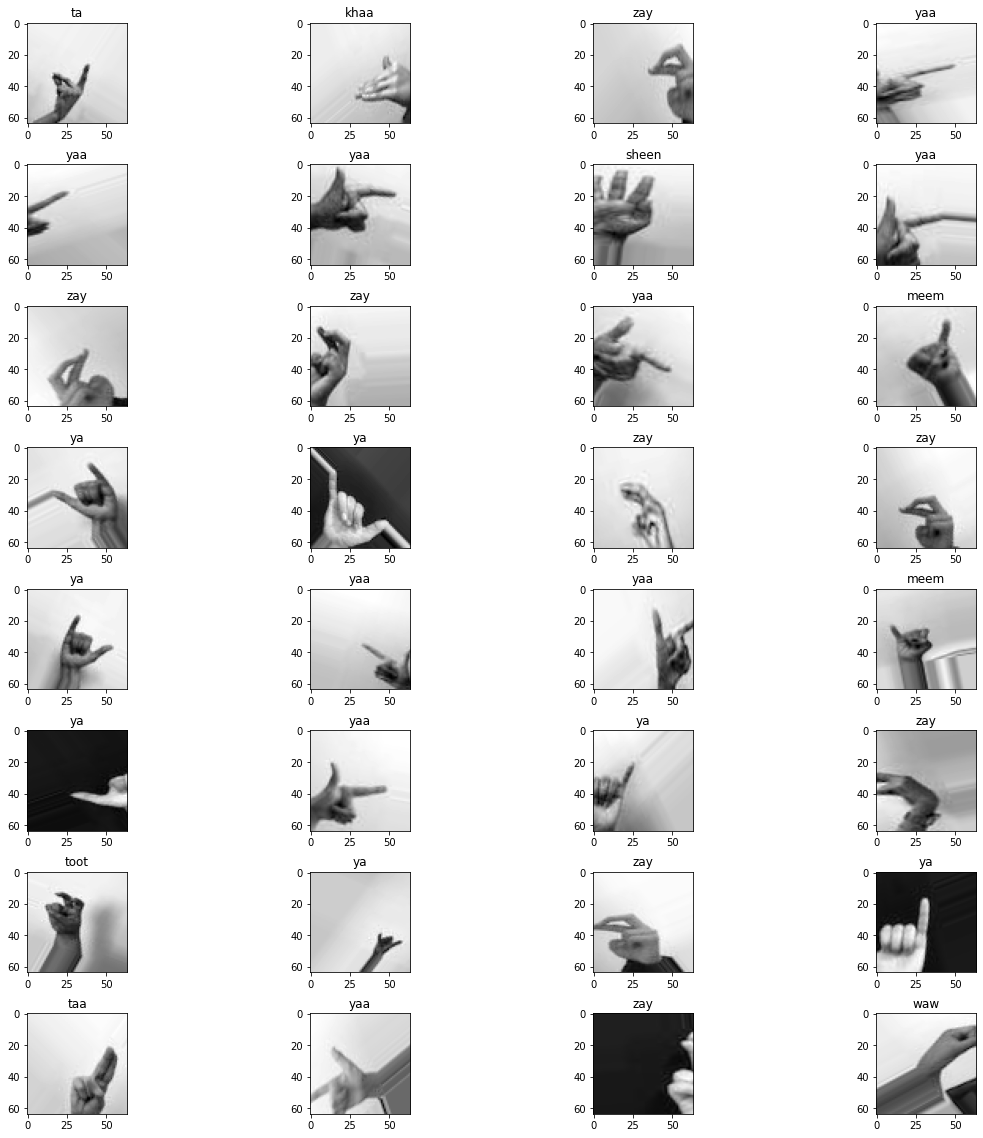

In [ ]:
fig, axes = plt.subplots(8,4, figsize=(16,16))
fig.tight_layout(pad=2.0)
for i in range(32):
    axes.flat[i].title.set_text(class_names[int(labels[i])])
    axes.flat[i].imshow(images[i].reshape(64,64), cmap='gray')

## Design the ANN/CNN Model

In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, GlobalAveragePooling2D, BatchNormalization, Dropout, Dense,Flatten

def create_model(optimizer='adam', kernel_initializer='he_normal', activation='relu'):
  # create model
  model = Sequential()
  model.add(Conv2D(filters=16, kernel_size=3, padding='same', input_shape=(64, 64, 1), kernel_initializer=kernel_initializer, activation=activation))
  model.add(BatchNormalization())
  model.add(MaxPooling2D(pool_size=2))
  model.add(Dropout(0.2))

  model.add(Conv2D(filters=32, kernel_size=3, padding='same', kernel_initializer=kernel_initializer, activation=activation))
  model.add(BatchNormalization())
  model.add(MaxPooling2D(pool_size=2))
  model.add(Dropout(0.2))

  model.add(Conv2D(filters=64, kernel_size=3, padding='same', kernel_initializer=kernel_initializer, activation=activation))
  model.add(BatchNormalization())
  model.add(MaxPooling2D(pool_size=2))
  model.add(Dropout(0.2))

  model.add(Conv2D(filters=128, kernel_size=3, padding='same', kernel_initializer=kernel_initializer, activation=activation))
  model.add(BatchNormalization())
  model.add(MaxPooling2D(pool_size=2))
  model.add(Dropout(0.2))
  model.add(GlobalAveragePooling2D())
  #Fully connected final layer
  model.add(Dense(32, activation='softmax'))
  return model

In [ ]:
model=create_model(optimizer='adam',kernel_initializer='he_normal', activation='relu')
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')

In [ ]:
model.summary()



Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 64, 64, 16)        160       
_________________________________________________________________
batch_normalization (BatchNo (None, 64, 64, 16)        64        
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 32, 32, 16)        0         
_________________________________________________________________
dropout (Dropout)            (None, 32, 32, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 32)        4640      
_________________________________________________________________
batch_normalization_1 (Batch (None, 32, 32, 32)        128       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 32)        0

## Train the Model

In [ ]:
history = model.fit_generator(data_generator.flow(train_generator, batch_size=32),
                              epochs=10, verbose=2,
    validation_data=(validation_generator))

## Evaluate the Model

In [ ]:
model.validation(validation_generator)

## Save the Model

In [ ]:
model.save('my_model.h5')

## Test the Model Using the Camera

In [ ]:
model = keras.models.load_model('mymodel.h5')

In [ ]:
camera = cv2.VideoCapture(0)
while True:
    ret, img = camera.read()
    cv2.rectangle(img, (100, 100), (600, 600), (255, 0, 0), 2)
    cropped = img[100:600, 100:600]
    resized = (cv2.cvtColor(cv2.resize(cropped, (64, 64)), cv2.COLOR_RGB2GRAY)) / 255.0
    data = resized.reshape(-1, 64, 64, 1)
    model_out = model.predict_classes([data])[0]
    label = class_names[model_out]
    # font 
    font = cv2.FONT_HERSHEY_SIMPLEX 
    # org 
    org = (50, 50) 
    # fontScale 
    fontScale = 1
    # Blue color in BGR 
    color = (255, 0, 0) 
    # Line thickness of 2 px 
    thickness = 2
    # Using cv2.putText() method 
    img = cv2.putText(img, label, org, font, fontScale, color, thickness, cv2.LINE_AA)
    cv2.imshow('img', img)

    if cv2.waitKey(25) & 0xFF == ord('q'):
        cv2.destroyAllWindows()
        break
camera.release()